In [ ]:
import numpy as np
import pandas as pd

# Importing Data

In [ ]:
crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Explore the dataset

In [ ]:
crop.shape

(2200, 8)

In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
crop.duplicated().sum()

0

In [ ]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Exploring Data

In [ ]:
# Example: One-hot encoding for categorical columns
encoded_df = pd.get_dummies(crop)  # Convert categorical columns to one-hot encoding
corr = encoded_df.corr()  # Calculate correlation matrix


In [ ]:
import plotly.graph_objs as go

fig = go.Figure(data=go.Heatmap(z=corr.values, x=corr.index, y=corr.columns, colorscale='Viridis'))
fig.show()


In [ ]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

<ipython-input-31-211224c7771d>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




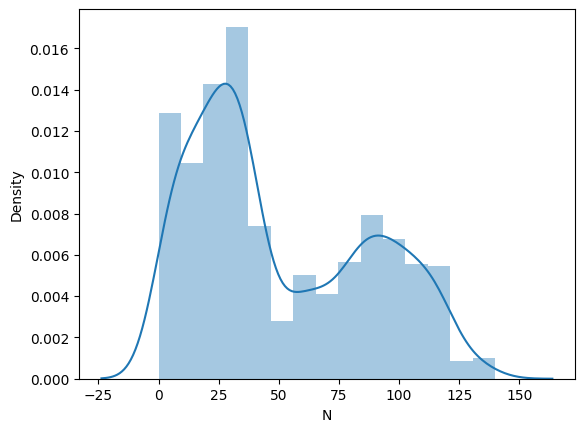

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(crop['N'])
plt.show()

# Encoding

In [ ]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=crop['label'].map(crop_dict)

In [ ]:
crop['crop_num'].value_counts()

crop_num
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

In [ ]:
# crop.drop(['label'],axis=1,inplace=True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


# Train Test Split

In [ ]:
X = crop.drop(['crop_num','label'],axis=1)
y = crop['crop_num']

In [ ]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [ ]:
y.shape

(2200,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(1760, 7)

In [ ]:
X_test.shape

(440, 7)

In [ ]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430



# Scale the features using MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [ ]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

# Standarization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

# Training Models

# Predictive System

In [ ]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    transformed_features = ms.fit_transform(features)
    transformed_features = sc.fit_transform(transformed_features)
    svm.fit(X_train,y_train)
    prediction = svm.predict(transformed_features).reshape(1,-1)

    return prediction[0]

In [ ]:


N = 64
P = 35
k = 44
temperature = 26.491096
humidity = 180.158363
ph = 5.980401
rainfall = 202.864034
predict = np.array(recommendation(N, P, k, temperature, humidity, ph, rainfall))

crop_dict = {
    1: "Rice",
    2: "Maize",
    3: "Jute",
    4: "Cotton",
    5: "Coconut",
    6: "Papaya",
    7: "Orange",
    8: "Apple",
    9: "Muskmelon",
    10: "Watermelon",
    11: "Grapes",
    12: "Mango",
    13: "Banana",
    14: "Pomegranate",
    15: "Lentil",
    16: "Blackgram",
    17: "Mungbean",
    18: "Mothbeans",
    19: "Pigeonpeas",
    20: "Kidneybeans",
    21: "Chickpea",
    22: "Coffee"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry, we are not able to recommend a proper crop for this environment")

Sorry, we are not able to recommend a proper crop for this environment


In [ ]:
import pickle
pickle.dump(ms,open('minmaxscaler.pkl','wb'))
pickle.dump(sc,open('standscaler.pkl','wb'))

*Exploring data through different plots*

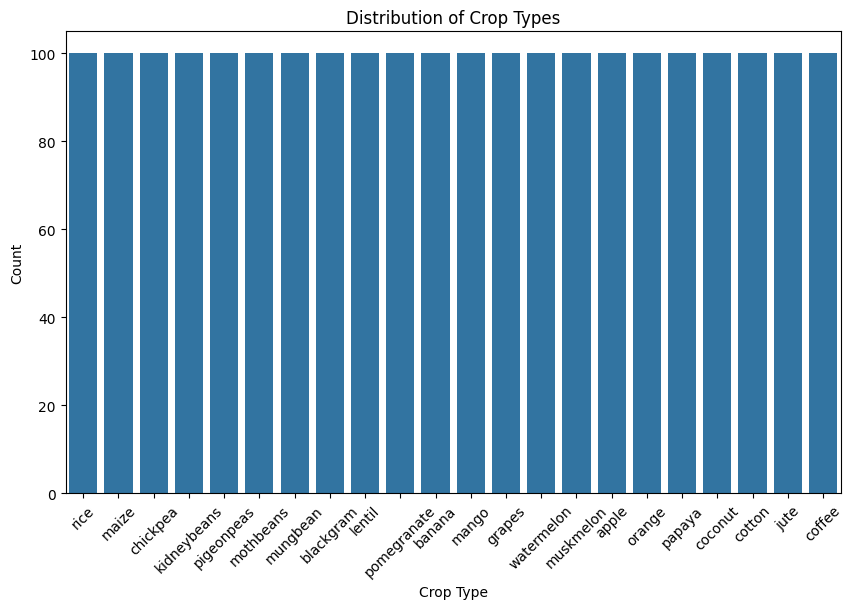

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the crop dataset into a DataFrame
crop_df = pd.read_csv('Crop_recommendation.csv')

# Create the count plot
plt.figure(figsize=(10, 6))  # Adjust figure size
sns.countplot(x='label', data=crop_df)
plt.title('Distribution of Crop Types')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


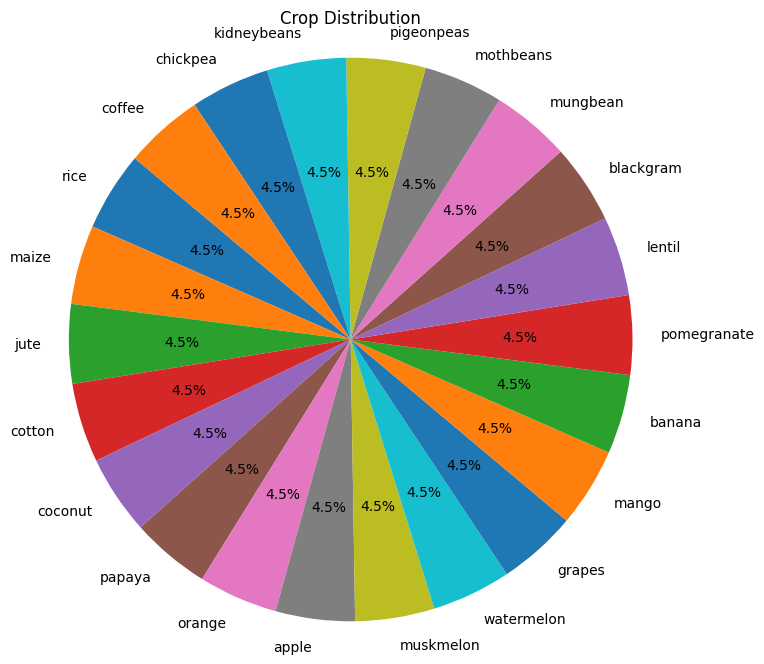

In [ ]:
plt.figure(figsize=(8, 8))
crop_counts = crop_df['label'].value_counts()
plt.pie(crop_counts, labels=crop_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Crop Distribution')
plt.axis('equal')
plt.show()


<Figure size 1200x800 with 0 Axes>

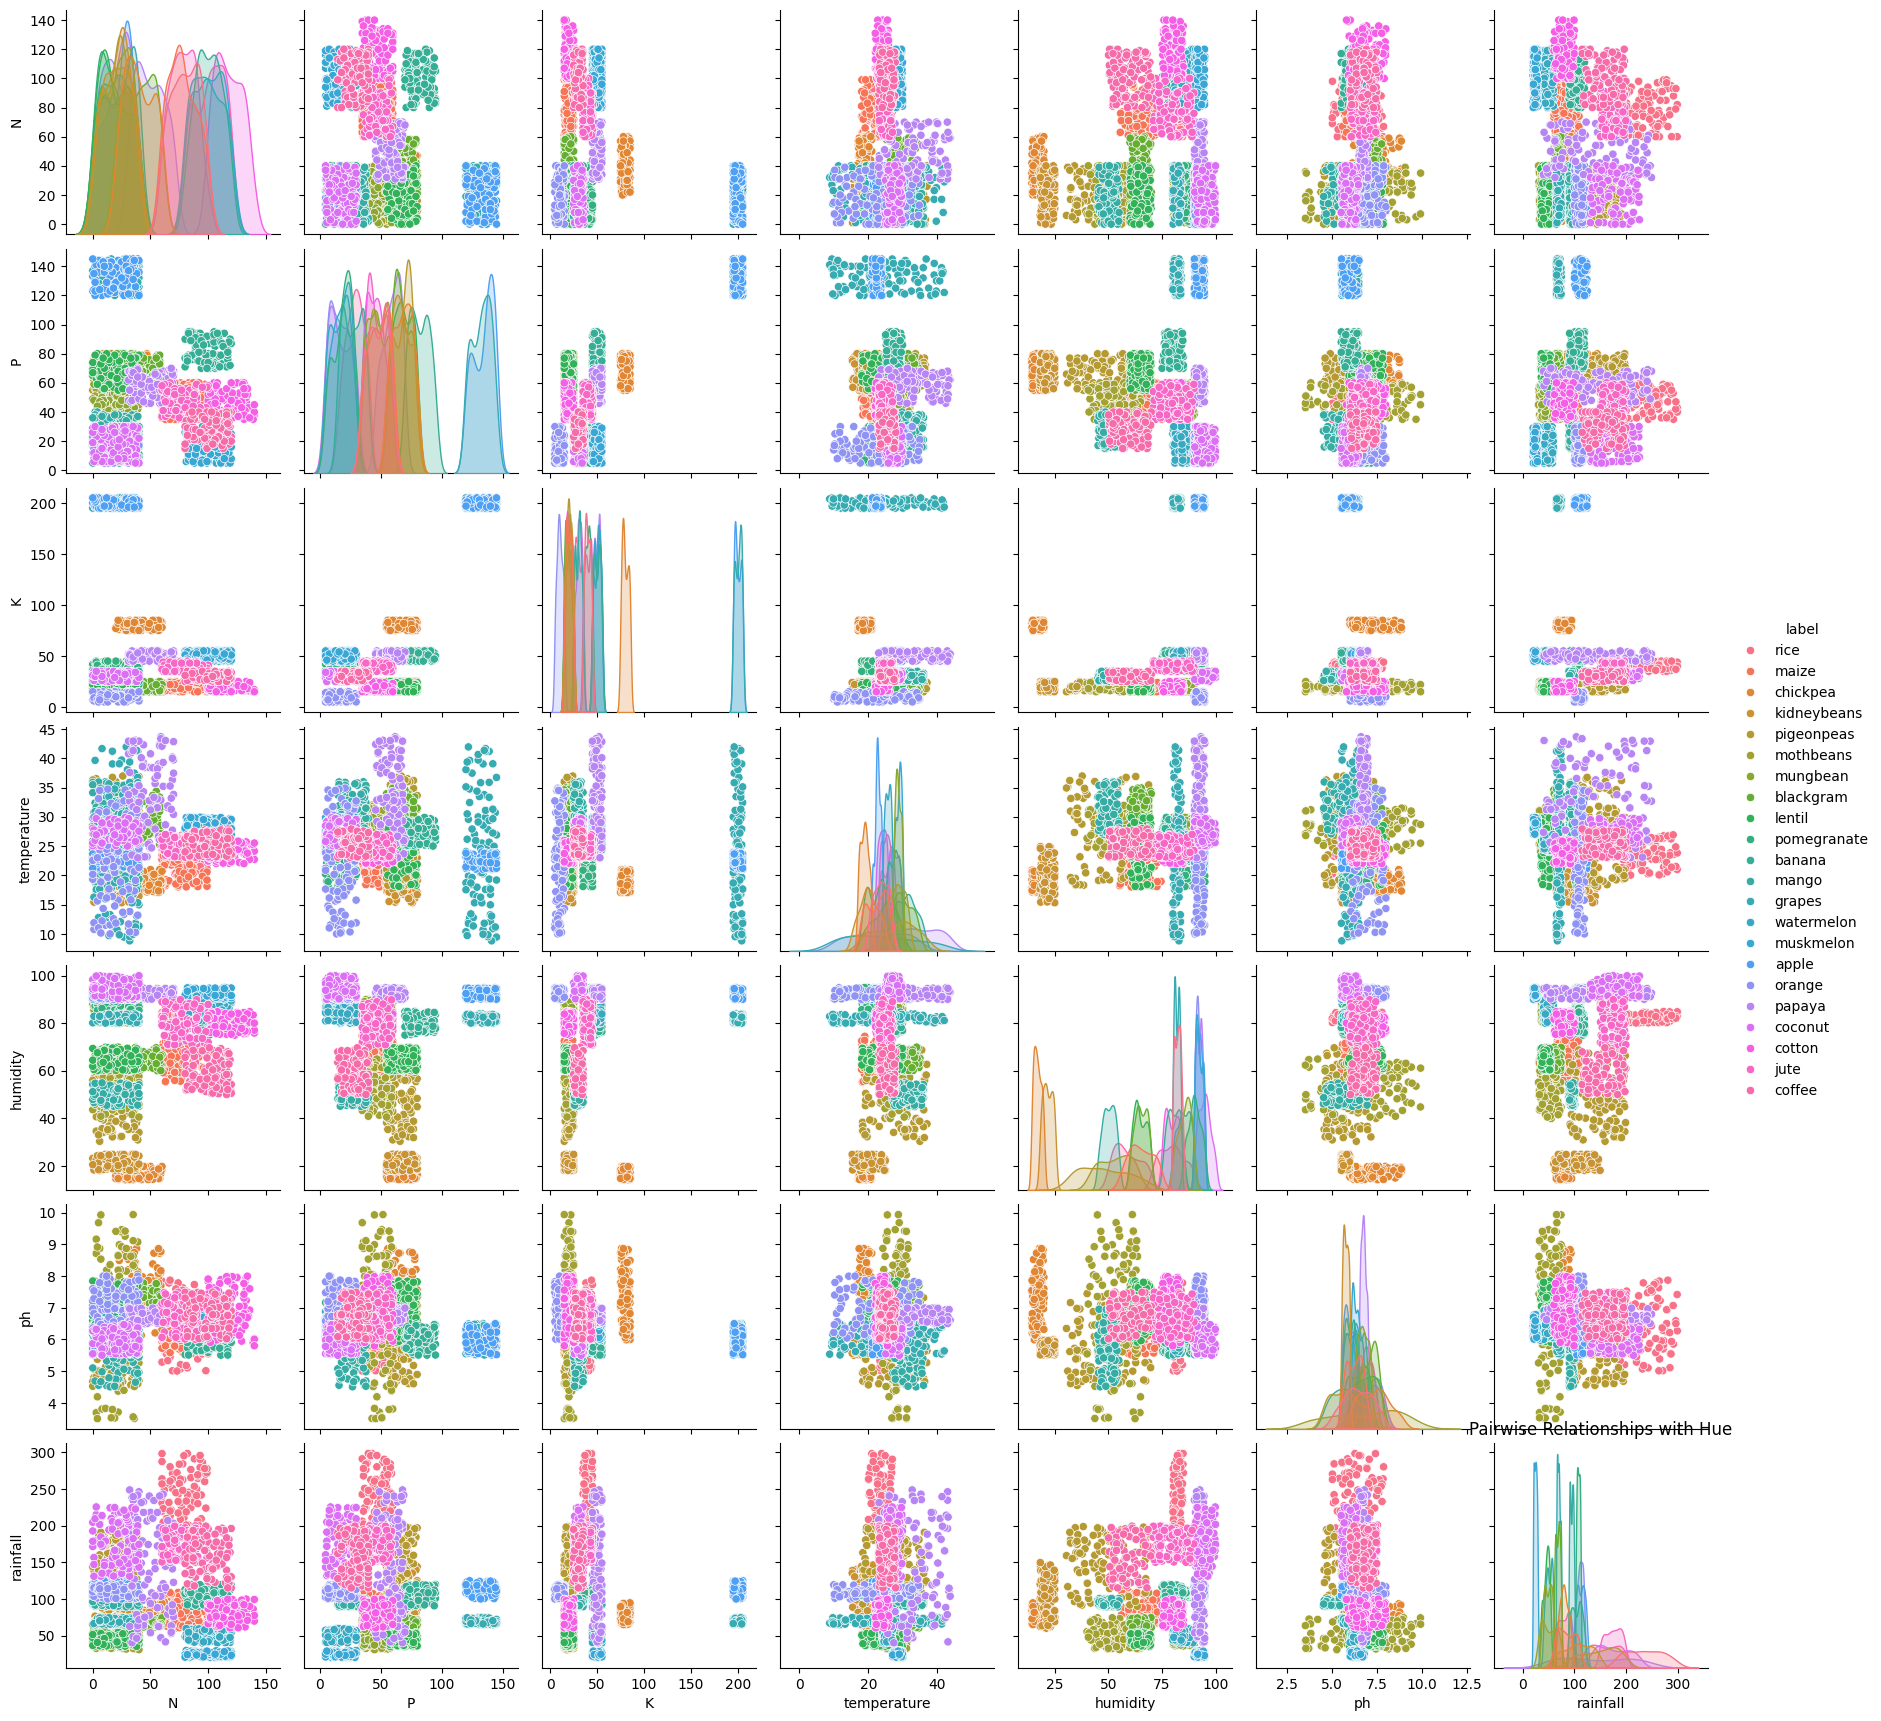

In [ ]:
plt.figure(figsize=(12, 8))
sns.pairplot(crop_df, hue='label', diag_kind='kde')
plt.title('Pairwise Relationships with Hue')
plt.show()


In [ ]:
print(crop_df.columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


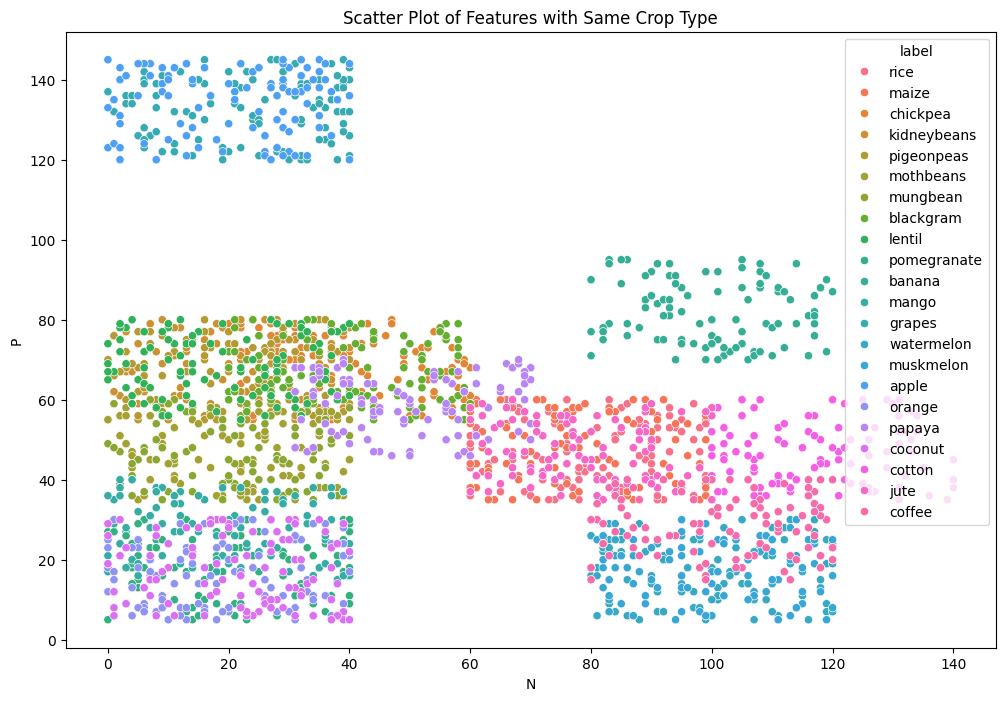

In [19]:
# Get the list of columns in the crop_df DataFrame
crop_df_columns = list(crop_df.columns)

# Change the code to use the correct column names
plt.figure(figsize=(12, 8))
sns.scatterplot(x=crop_df_columns[0], y=crop_df_columns[1], hue='label', data=crop_df)
plt.title('Scatter Plot of Features with Same Crop Type')
plt.show()

**Support Vector Machine**

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC,svm_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.decomposition import PCA
import seaborn as sns


In [ ]:
# Load dataset
def load_dataset(fname):
    data = pd.read_csv(fname)
    X = data.iloc[:, :-1]  # Features
    y = data.iloc[:, -1]   # Target variable
    return X, y

In [ ]:
# Load the entire dataset
X, y = load_dataset('Crop_recommendation.csv')

In [ ]:

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:

# Define SVM classifier
svm_classifier = SVC(kernel='rbf')  # You can adjust kernel type as needed

# Define scalers
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler()
}

# Perform cross-validation for each scaler
for scaler_name, scaler in scalers.items():
    # Scale features using the scaler
    X_scaled = scaler.fit_transform(X)

    # Perform cross-validation
    cv_scores = cross_val_score(svm_classifier, X_scaled, y, cv=5)  # 5-fold cross-validation
    print(f'{scaler_name} SVM Cross-Validation Scores:', cv_scores)
    print(f'{scaler_name} SVM Mean Accuracy:', cv_scores.mean())
    print()


StandardScaler SVM Cross-Validation Scores: [0.97954545 0.98409091 0.98181818 0.98181818 0.98409091]
StandardScaler SVM Mean Accuracy: 0.9822727272727272

MinMaxScaler SVM Cross-Validation Scores: [0.97954545 0.98409091 0.98863636 0.98409091 0.97954545]
MinMaxScaler SVM Mean Accuracy: 0.9831818181818182



In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:

# Define hyperparameters for SVM
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}

# Perform grid search cross-validation to find the best hyperparameters
svm = SVC(kernel='rbf')
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]})

In [ ]:
# Get the best hyperparameters found by grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the SVM classifier with the best hyperparameters
best_svm = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
best_svm.fit(X_train, y_train)


Best Hyperparameters: {'C': 1, 'gamma': 1}


SVC(C=1, gamma=1)

In [ ]:

# Predict the response for the test data
yhat = best_svm.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, yhat)
print("Accuracy: %.2f" % (accuracy * 100))


Accuracy: 98.41


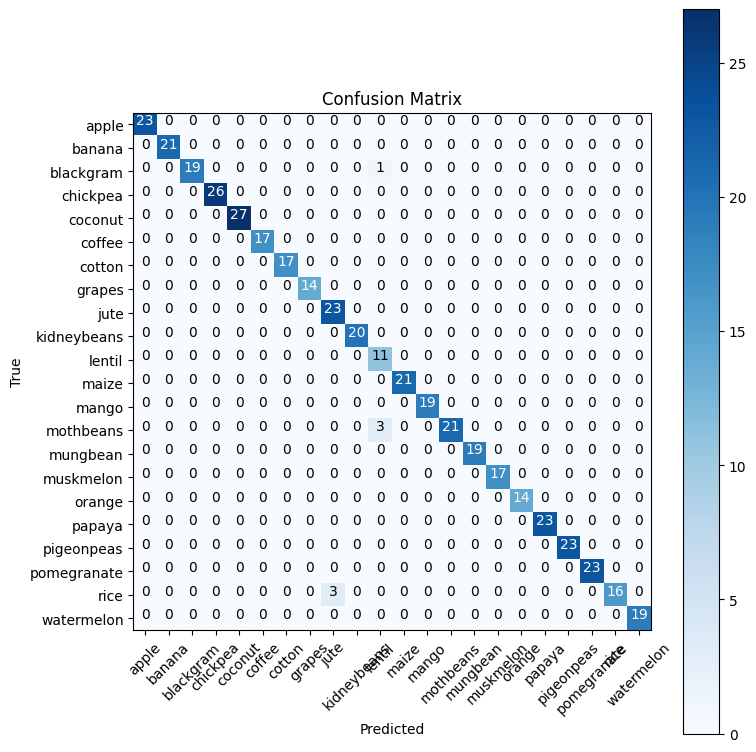

In [ ]:

# Calculate confusion matrix
cm = confusion_matrix(y_test, yhat)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45)
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(len(np.unique(y))):
    for j in range(len(np.unique(y))):
        plt.text(j, i, str(cm[i][j]), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")
plt.tight_layout()

In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, yhat))


Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.88      1.00      0.94        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.73      1.00      0.85        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.88      0.93        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
    

In [37]:
# Extract SVM metrics from the classification report
svm_f1_score = svm_report['weighted avg']['f1-score']
svm_precision = svm_report['weighted avg']['precision']
svm_support = svm_report['weighted avg']['support']
svm_recall = svm_report['weighted avg']['recall']

# Print SVM metrics
print("SVM F1 Score:", svm_f1_score*100)
print("SVM Precision:", svm_precision*100)
print("SVM Support:", svm_support)
print("SVM Recall:", svm_recall*100)


SVM F1 Score: 99.31754816901672
SVM Precision: 99.37348484848485
SVM Support: 440
SVM Recall: 99.31818181818181


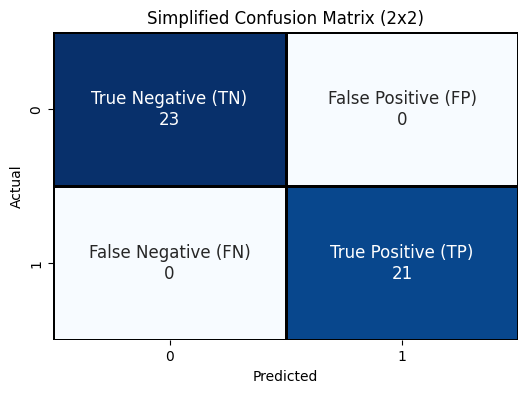

In [ ]:

# Assuming y_test and y_pred are your true labels and predicted labels respectively
# Compute confusion matrix
cm = confusion_matrix(y_test, yhat)
# Extract TP, FP, TN, FN
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]

# Create a simplified confusion matrix (2x2)
simplified_cm = np.array([[TN, FP], [FN, TP]])

# Define labels for the simplified confusion matrix
labels = np.array([['True Negative (TN)\n' + str(TN), 'False Positive (FP)\n' + str(FP)],
                   ['False Negative (FN)\n' + str(FN), 'True Positive (TP)\n' + str(TP)]])

# Plot simplified confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(simplified_cm, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=1, linecolor='black', annot_kws={'size': 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Simplified Confusion Matrix (2x2)')
plt.show()

In [ ]:

# Apply PCA to reduce dimensionality to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Convert string labels to numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Train SVM model
svm_classifier = SVC(kernel='rbf', gamma='scale')
svm_classifier.fit(X_train, y_train_encoded)

SVC()

Text(0, 0.5, 'Principal Component 2')

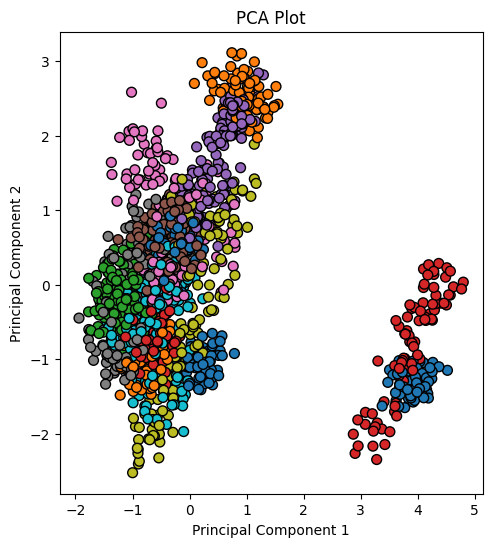

In [ ]:
# Plot PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_encoded, cmap='tab10', s=50, edgecolors='k')
plt.title('PCA Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


<ipython-input-24-e358c15f6e6d>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train[mask, 0], X_train[mask, 1], c=colors[i], s=100, edgecolors='k', label=f'Support Vector {i+1}')


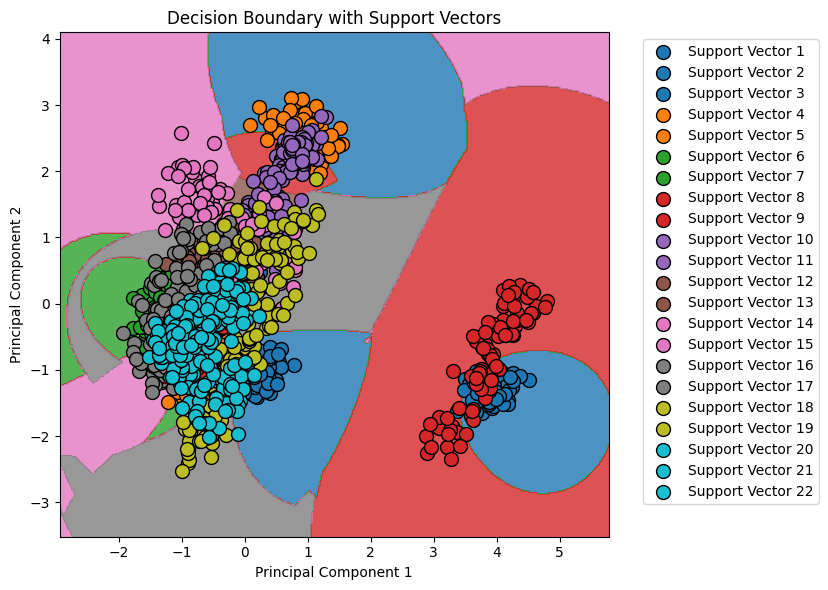

In [ ]:
plt.figure(figsize=(14, 6))
# Plot decision boundary with support vectors
plt.subplot(1, 2, 2)
h = .02  # Step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='tab10', alpha=0.8)

# Plot support vectors with different colors
unique_labels = np.unique(y_train_encoded)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))
for i, label in enumerate(unique_labels):
    mask = (y_train_encoded == label)
    plt.scatter(X_train[mask, 0], X_train[mask, 1], c=colors[i], s=100, edgecolors='k', label=f'Support Vector {i+1}')

plt.title('Decision Boundary with Support Vectors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


RANDOM FOREST CLASSIFIER

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
def load_dataset(fname):
    data = pd.read_csv(fname)
    X = data.iloc[:, :-1]  # Features
    y = data.iloc[:, -1]   # Target variable
    return X, y

# Load the entire dataset
X, y = load_dataset('Crop_recommendation.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 99.32%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papa

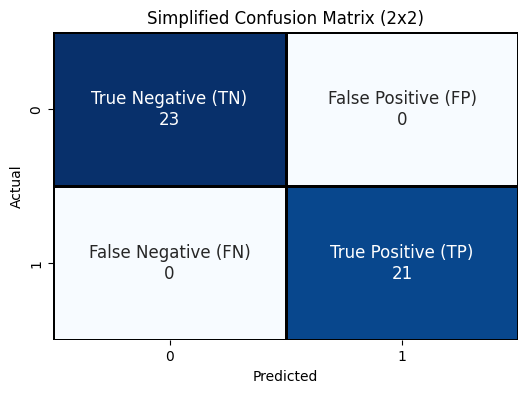

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract TP, FP, TN, FN
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]

# Create a simplified confusion matrix (2x2)
simplified_cm = np.array([[TN, FP], [FN, TP]])

# Define labels for the simplified confusion matrix
labels = np.array([['True Negative (TN)\n' + str(TN), 'False Positive (FP)\n' + str(FP)],
                   ['False Negative (FN)\n' + str(FN), 'True Positive (TP)\n' + str(TP)]])

# Plot simplified confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(simplified_cm, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=1, linecolor='black', annot_kws={'size': 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Simplified Confusion Matrix (2x2)')
plt.show()


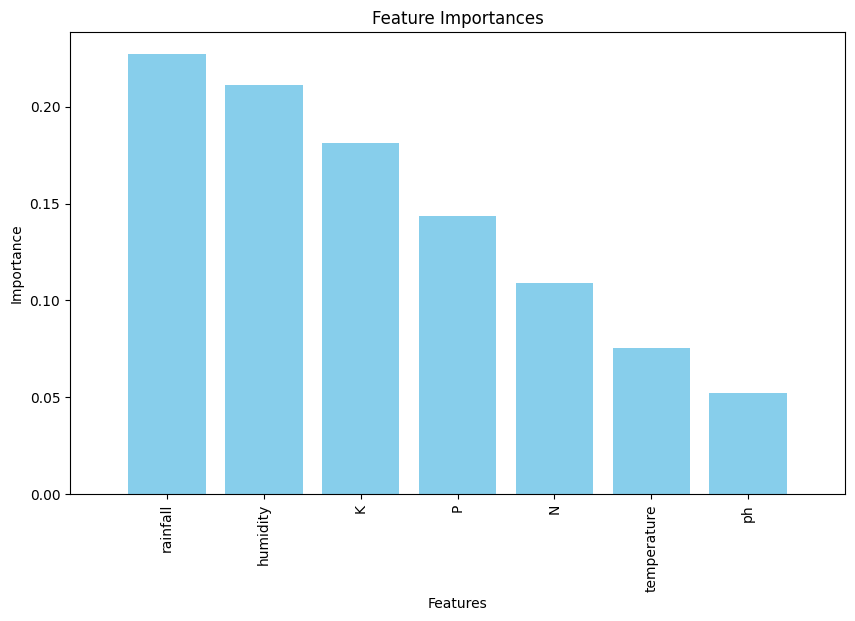

In [2]:
import matplotlib.pyplot as plt

# Feature importances
importances = rf_classifier.feature_importances_
features = X.columns
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="skyblue", align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


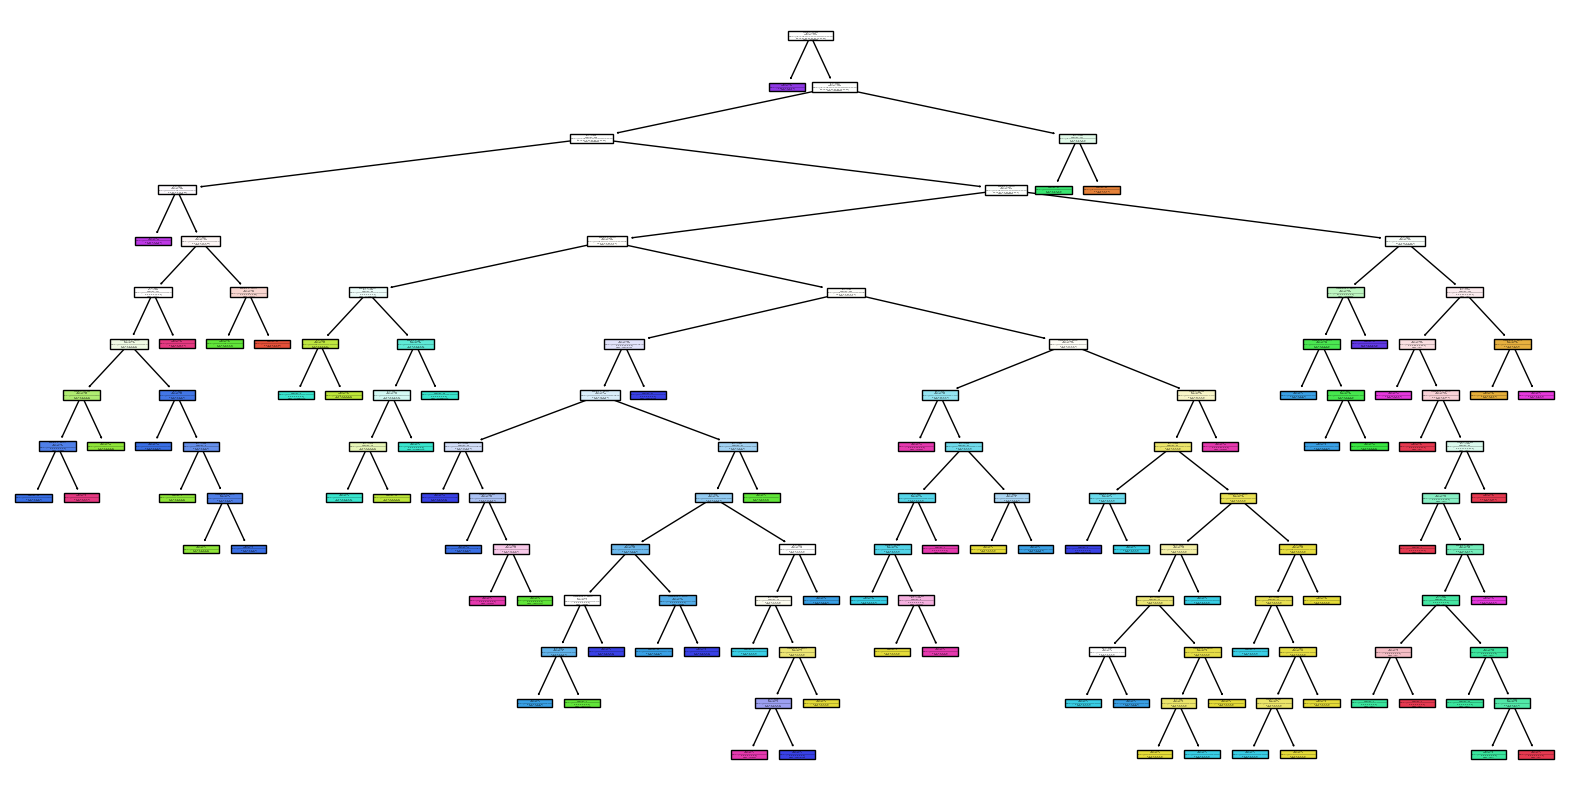

In [3]:
from sklearn.tree import plot_tree

# Visualize one of the decision trees from the Random Forest
plt.figure(figsize=(20,10))
plot_tree(rf_classifier.estimators_[0], feature_names=X.columns, class_names=y.unique(), filled=True)
plt.show()


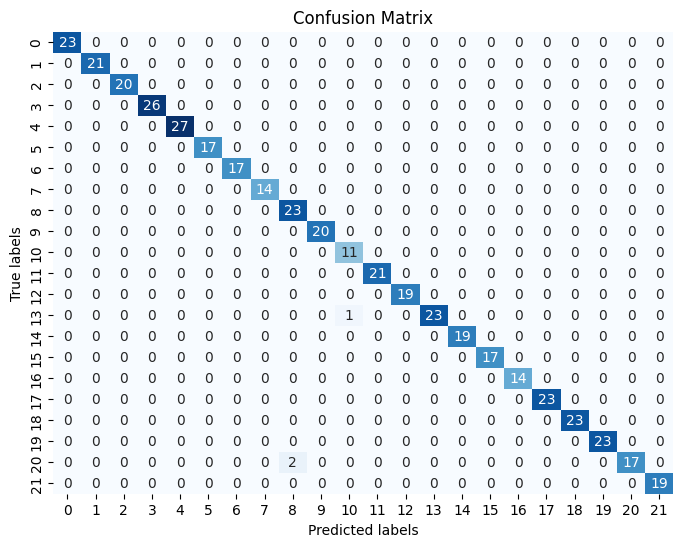

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [36]:
from sklearn.metrics import classification_report

# Compute classification report for RFC
rfc_report = classification_report(y_test, y_pred, output_dict=True)
rfc_f1_score = rfc_report['macro avg']['f1-score']
rfc_support = rfc_report['macro avg']['support']
rfc_precision = rfc_report['macro avg']['precision']
rfc_recall = rfc_report['macro avg']['recall']


# Print the results
print("Random Forest Classifier (RFC) Metrics:")
print("F1 Score:", rfc_f1_score*100)
print("Support:", rfc_support)
print("Precision:", rfc_precision*100)
print("Recall:", rfc_recall*100)




Random Forest Classifier (RFC) Metrics:
F1 Score: 99.26374055074331
Support: 440
Precision: 99.25757575757575
Recall: 99.33213716108455
